<a href="https://colab.research.google.com/github/anuj-l22/PyTorch_ZTM/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [1]:
what_were_covering = {1:"data preparing and loading",
                      2: "build mdoel",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loadong a model ",
                      6: "putting it all together"}
what_were_covering

{1: 'data preparing and loading',
 2: 'build mdoel',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loadong a model ',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything,,, in machine learning

* Excel spreadsheet
* Images of any kind
* Videps
* Audio
* DNA
* Text

Machine Learning has two parts:
1. Get data into numerical representation
2. Learn patterns in that numerical representation

Let's create *known* data using linear regression formula

In [3]:
# Create *known* paramters
weight = 0.7
bias = 0.3

# Cretae
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting datasets into training and test sets

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

How we can visualize data ?

In [6]:
def plot_predictions(train_data= X_train ,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions = None):

  plt.figure(figsize=(10,7))
  # Plotting training dta in blue
  plt.scatter(train_data,train_labels, c='b',s=4,label="Training Data")

  # Plotting test data in blue
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
  plt.legend(prop={"size":14})

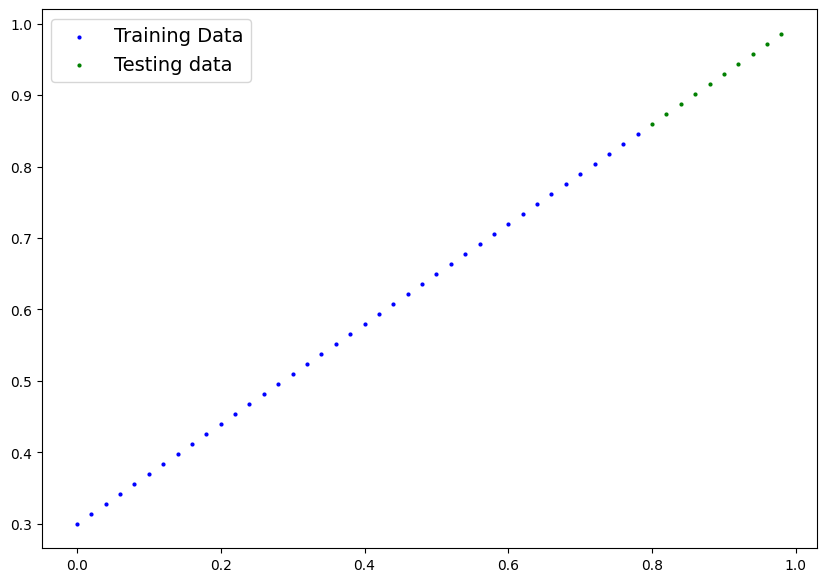

In [7]:
plot_predictions()

## 2. Building model
First PyTorch model

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch imports from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    # Forward method to define computation in the model

  def forward(self , x: torch.Tensor) -> torch.Tensor :
    return self.weights * x + self.bias


### PyTorch model building essentials

* torch.nn = contains all building blocks for computational graphs (nn is a generalization)
* torch.nn.Parameter
* torch.nn.Module
* torch.optim
* def forward() : For forward pass


### Checking contents of PyTorch models

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model() this is sublass of nn.Module
model_0 = LinearRegressionModel()

# Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, we can check how it predicts y_test based on x_test
Runs data passed through forward() methid

In [12]:
y_preds = model_0(X_test)
y_preds
# Infernece mode disables everything that is used in training like the grad in below output is disabled in inference mode

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

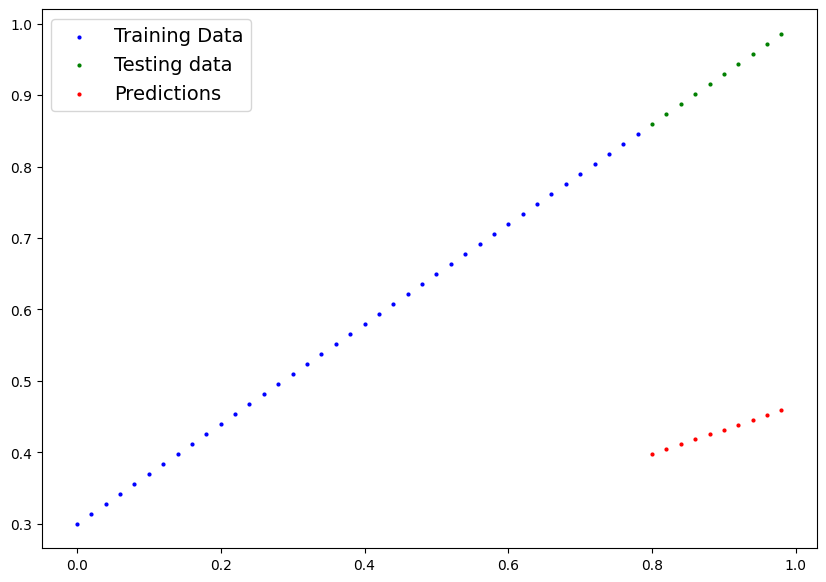

In [15]:
plot_predictions(predictions = y_preds)

## 3. Train Model

The whole idea of training is to move from some *unknown* parameters to some *known* parameters

One way to measure how poor or how wrong your model predictions are using loss functions

Things to train:
* **Loss function**
* **Optimizer**

For PyTorch we need:
* Training Loop
* Testing Loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a Loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr is learning rate , a very important hyperparamter

### Building a training loop (and a Testing loop) in PyTorch

A couple of things in training loop:
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - move backwards to calculate gradients of parameters of model
5. Optimizer step - Use optimizer to adjust parameters to improve loss

In [19]:
# An epoch is one loop through the data (epoch is a hyperparameter)
epochs = 200

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
  model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perfrom backpropagation on loss with respect to the parameters
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # Turns off differernt setting not required for evaluation/testing (dropout/batch normalization)
  with torch.inference_mode(): # Turns off gradient tracking
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out what's happening
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss: {test_loss} ")
    print(model_0.state_dict(),'\n')


Epoch : 0 | Loss : 0.31288138031959534 | Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch : 10 | Loss : 0.1976713240146637 | Test Loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))]) 

Epoch : 20 | Loss : 0.08908725529909134 | Test Loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))]) 

Epoch : 30 | Loss : 0.053148526698350906 | Test Loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))]) 

Epoch : 40 | Loss : 0.04543796554207802 | Test Loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))]) 

Epoch : 50 | Loss : 0.04167863354086876 | Test Loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))]) 

Epoch : 60 | Loss : 0.03818932920694351 | Test Loss: 0.08886633068323135 
OrderedDict([('weights', tensor([0

In [20]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

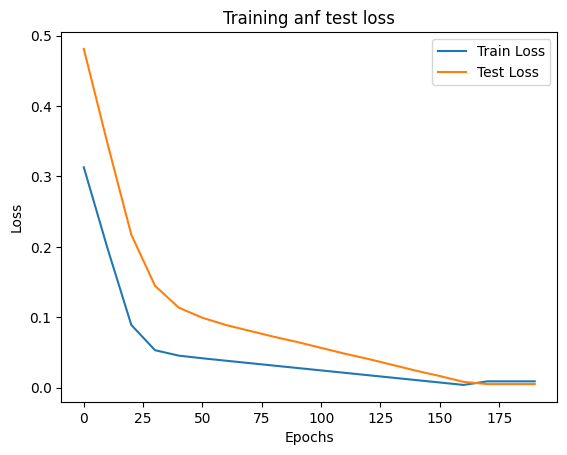

In [21]:
# Plot the loss values
plt.plot(epoch_count , np.array(torch.tensor(loss_values).numpy()) , label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training anf test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

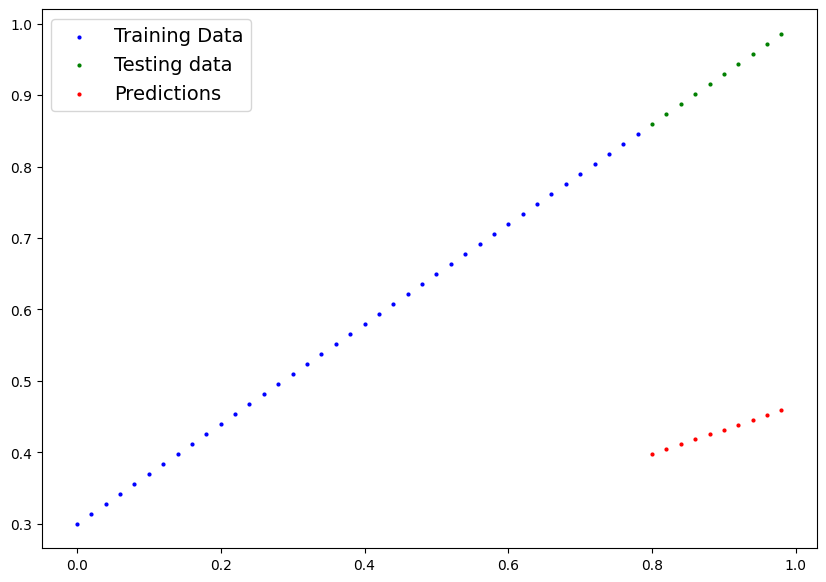

In [23]:
plot_predictions(predictions = y_preds)

In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

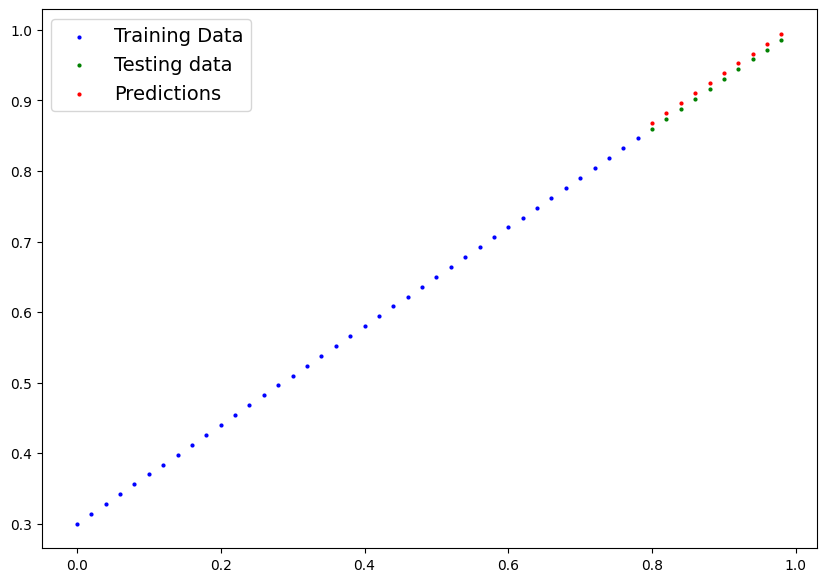

In [25]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods for saving and loading the model

1. `torch.save()` - Save PyTorch object in Python's pickle format
2. `torch.load()` - allows to load saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True , exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [28]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Aug 16 12:47 01_pytorch_workflow_model_0.pth


## Loading a PyTorcg model

Since we saved our model's `state_dict()` raher than entire model, we create a new instance of model class and load `state_dict()` into that

In [29]:
# To load in a a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [31]:
# Make some [redictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [33]:
# Compare preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [34]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

Create device-agnostic code

This means if we've got access to a GPU , our code will use it

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device : {device}")

Using device : cuda


In [37]:
!nvidia-smi

Fri Aug 16 12:47:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

In [38]:
# Create some data using linear regression formula y = mx + c
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and lables)
X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [39]:
# Split the data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### **Observation** : Did'nt reequire to convert to numpy for scatter but plot is stricter as it is continuous

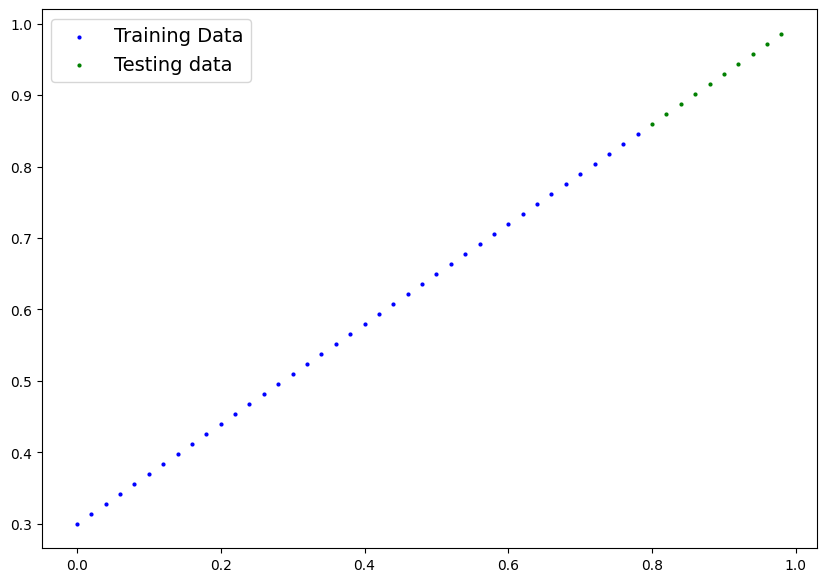

In [40]:
# Plot the data
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a PyTorch Linear model

In [41]:
# Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model paramters / also called linear transorm , probing layer,fully connected layer
    self.linear_layer = nn.Linear(in_features = 1 ,
                                  out_features = 1)
  def forward(self, x: torch.Tensor) -> torch.Tensor():
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training code

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop


In [47]:
# Setup Loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [49]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on same device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_preds = model_1(X_train)

  # 2. Compute Loss
  loss = loss_fn(y_preds,y_train)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Backprop
  loss.backward()

  # 5. Graient Descent
  optimizer.step()

  ### Testing

  model_1.eval()

  with torch.inference_mode(): # Is context manager
    test_preds = model_1(X_test)

    test_loss = loss_fn(test_preds,y_test)

  # Print out what's happening

  if epoch%10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")


Epoch : 0 | Loss : 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch : 10 | Loss : 0.439968079328537 | Test loss : 0.4392664134502411
Epoch : 20 | Loss : 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954833924770355 | Test loss : 0.16984669864177704
Epoch : 40 | Loss : 0.09433845430612564 | Test loss : 0.03513690456748009
Epoch : 50 | Loss : 0.023886388167738914 | Test loss : 0.04784907028079033
Epoch : 60 | Loss : 0.019956795498728752 | Test loss : 0.045803118497133255
Epoch : 70 | Loss : 0.016517987474799156 | Test loss : 0.037530567497015
Epoch : 80 | Loss : 0.013089174404740334 | Test loss : 0.02994490973651409
Epoch : 90 | Loss : 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215683650225401 | Test loss : 0.014086711220443249
Epoch : 110 | Loss : 0.00278724217787385 | Test loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test loss : 0.013801801018416882
Epoch : 130 | Loss : 0.001264503

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight,bias

(0.7, 0.3)

### 6.4  Making and evaluating predictions

### ***Observation*** : NumPy is CPU based so GPU tensors won't work in plot_predictions , plt.scatter()

In [57]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

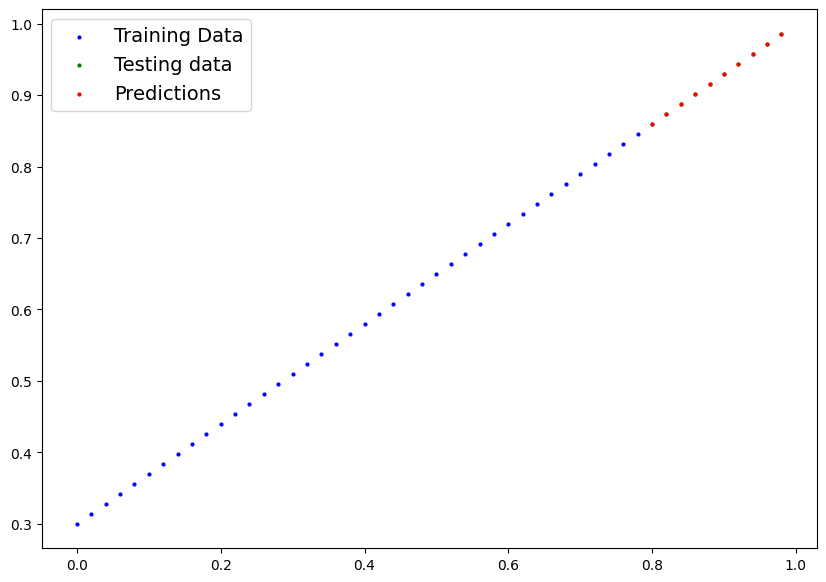

In [58]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and Loading a PyTorch Model

In [66]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)

# 2, Create model save path
MODEL_NAME = "01_PyTorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_workflow_model_1.pth


In [67]:
# Load a model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [68]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [69]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [70]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')